# Feature Importance Using Decision Trees

In [26]:
import psycopg2 as pg
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Establish connection to postgres
conn = pg.connect(database='postgres',
                  user='postgres',
                  password='w207final',
                  host='35.185.225.167')

In [28]:
approach2CombinedTrainingDataQuery = '''  SELECT * FROM prod."features" f WHERE (f."Season Type"='Regular') OR (f."Season" < 2014) ORDER BY "Season", "DayNum", "Team"  '''
df_approach2Combined_training = pd.read_sql_query(approach2CombinedTrainingDataQuery, conn)

In [29]:
approach2CombinedDevDataQuery = ''' SELECT * FROM prod."features" f WHERE (f."Season Type"='NCAA Tourney') AND (f."Season" > 2013) AND (f."Season" < 2018) order by "Season", "DayNum", "Team" '''
df_approach2Combined_dev = pd.read_sql_query(approach2CombinedDevDataQuery, conn)

In [30]:
conn.close()

In [31]:
target = 'Outcome'
features = ['TwoPointPct_Team', 'ThreePointPct_Team', 'FreeThrowPct_Team', 'OffensiveRebounds_Team', 'DefensiveRebounds_Team', 'TwoPointPct_Opponent', 'ThreePointPct_Opponent', 'FreeThrowPct_Opponent', 'OffensiveRebounds_Opponent', 'DefensiveRebounds_Opponent', 'AvgRank', 'OpponentAvgRank', 'WinPct', 'OpponentWinPct', 'WinPctDiff', 'AvgPointsFor', 'AvgPointsAgainst', 'AvgNetPointsFor', 'OpponentAvgPointsFor', 'OpponentAvgPointsAgainst', 'OpponentAvgNetPointsFor', 'TourWins', 'OpponentTourWins', 'TourWinsDiff']

In [32]:
rows_to_drop = (np.isnan(df_approach2Combined_training.Outcome)) | (np.isnan(df_approach2Combined_training.TwoPointPct_Team)) | (np.isnan(df_approach2Combined_training.ThreePointPct_Team)) | (np.isnan(df_approach2Combined_training.FreeThrowPct_Team)) | (np.isnan(df_approach2Combined_training.OffensiveRebounds_Team)) | (np.isnan(df_approach2Combined_training.DefensiveRebounds_Team)) | (np.isnan(df_approach2Combined_training.TwoPointPct_Opponent)) | (np.isnan(df_approach2Combined_training.ThreePointPct_Opponent)) | (np.isnan(df_approach2Combined_training.FreeThrowPct_Opponent)) | (np.isnan(df_approach2Combined_training.OffensiveRebounds_Opponent)) | (np.isnan(df_approach2Combined_training.DefensiveRebounds_Opponent)) | (np.isnan(df_approach2Combined_training.AvgRank)) | (np.isnan(df_approach2Combined_training.OpponentAvgRank)) | (np.isnan(df_approach2Combined_training.WinPct)) | (np.isnan(df_approach2Combined_training.OpponentWinPct)) | (np.isnan(df_approach2Combined_training.WinPctDiff)) | (np.isnan(df_approach2Combined_training.AvgPointsFor)) | (np.isnan(df_approach2Combined_training.AvgPointsAgainst)) | (np.isnan(df_approach2Combined_training.AvgNetPointsFor)) | (np.isnan(df_approach2Combined_training.OpponentAvgPointsFor)) | (np.isnan(df_approach2Combined_training.OpponentAvgPointsAgainst)) | (np.isnan(df_approach2Combined_training.OpponentAvgNetPointsFor)) | (np.isnan(df_approach2Combined_training.TourWins)) | (np.isnan(df_approach2Combined_training.OpponentTourWins)) | (np.isnan(df_approach2Combined_training.TourWinsDiff))

In [33]:
df_approach2Combined_training = df_approach2Combined_training.drop(df_approach2Combined_training[rows_to_drop].index)

In [34]:
rows_to_drop = (np.isnan(df_approach2Combined_dev.Outcome)) | (np.isnan(df_approach2Combined_dev.TwoPointPct_Team)) | (np.isnan(df_approach2Combined_dev.ThreePointPct_Team)) | (np.isnan(df_approach2Combined_dev.FreeThrowPct_Team)) | (np.isnan(df_approach2Combined_dev.OffensiveRebounds_Team)) | (np.isnan(df_approach2Combined_dev.DefensiveRebounds_Team)) | (np.isnan(df_approach2Combined_dev.TwoPointPct_Opponent)) | (np.isnan(df_approach2Combined_dev.ThreePointPct_Opponent)) | (np.isnan(df_approach2Combined_dev.FreeThrowPct_Opponent)) | (np.isnan(df_approach2Combined_dev.OffensiveRebounds_Opponent)) | (np.isnan(df_approach2Combined_dev.DefensiveRebounds_Opponent)) | (np.isnan(df_approach2Combined_dev.AvgRank)) | (np.isnan(df_approach2Combined_dev.OpponentAvgRank)) | (np.isnan(df_approach2Combined_dev.WinPct)) | (np.isnan(df_approach2Combined_dev.OpponentWinPct)) | (np.isnan(df_approach2Combined_dev.WinPctDiff)) | (np.isnan(df_approach2Combined_dev.AvgPointsFor)) | (np.isnan(df_approach2Combined_dev.AvgPointsAgainst)) | (np.isnan(df_approach2Combined_dev.AvgNetPointsFor)) | (np.isnan(df_approach2Combined_dev.OpponentAvgPointsFor)) | (np.isnan(df_approach2Combined_dev.OpponentAvgPointsAgainst)) | (np.isnan(df_approach2Combined_dev.OpponentAvgNetPointsFor)) | (np.isnan(df_approach2Combined_dev.TourWins)) | (np.isnan(df_approach2Combined_dev.OpponentTourWins)) | (np.isnan(df_approach2Combined_dev.TourWinsDiff))

In [35]:
df_approach2Combined_dev = df_approach2Combined_dev.drop(df_approach2Combined_dev[rows_to_drop].index)

In [36]:
X_train2_combined = df_approach2Combined_training[features]
y_train2_combined = df_approach2Combined_training[target]
X_dev2_combined  = df_approach2Combined_dev[features]
# Cast to 'int'
y_dev2_combined  = df_approach2Combined_dev[target].astype(int)

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

## Decision Tree: Feature Importance for Combined Reg Season / Tournament (before 2014)

In [38]:
dt.fit(X_train2_combined, y_train2_combined)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

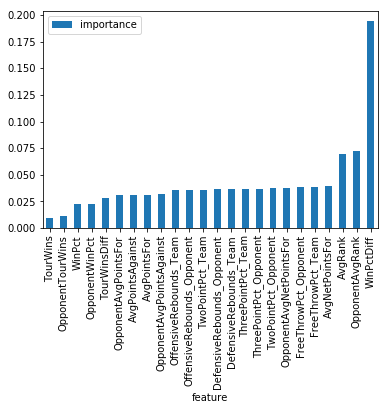

In [39]:
importance_df = pd.DataFrame({
        'feature': features,
        'importance': dt.feature_importances_
    })
importance_df.sort_values(by='importance').plot(x='feature', kind='bar')

In [40]:
importance_df.sort_values(by='importance', ascending=False)

,feature,importance
14,WinPctDiff,0.194413
11,OpponentAvgRank,0.072429
10,AvgRank,0.069133
17,AvgNetPointsFor,0.039128
2,FreeThrowPct_Team,0.038863
7,FreeThrowPct_Opponent,0.038181
20,OpponentAvgNetPointsFor,0.037904
5,TwoPointPct_Opponent,0.037726
6,ThreePointPct_Opponent,0.036921
1,ThreePointPct_Team,0.036717


## Decision Tree: Feature Importance for Tournament  (2014-2017)

In [41]:
dt.fit(X_dev2_combined, y_dev2_combined)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

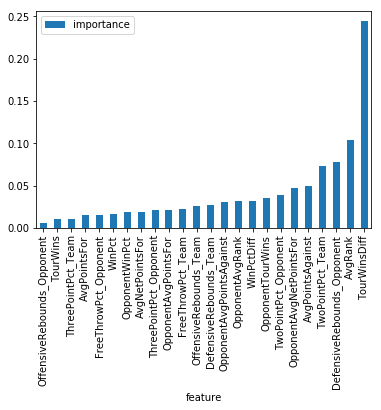

In [42]:
importance_df = pd.DataFrame({
        'feature': features,
        'importance': dt.feature_importances_
    })
importance_df.sort_values(by='importance').plot(x='feature', kind='bar')

In [43]:
importance_df.sort_values(by='importance', ascending=False)

,feature,importance
23,TourWinsDiff,0.244711
10,AvgRank,0.104048
9,DefensiveRebounds_Opponent,0.078052
0,TwoPointPct_Team,0.073264
16,AvgPointsAgainst,0.050027
20,OpponentAvgNetPointsFor,0.047065
5,TwoPointPct_Opponent,0.039234
22,OpponentTourWins,0.035836
14,WinPctDiff,0.032196
11,OpponentAvgRank,0.032189


#### Remarks:
WinPctDiff makes a difference in the regular season, but makes less of a difference in the tournament.

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True)

## Random Forest: Feature Importance for Combined Reg Season / Tournament (before 2014)

In [45]:
rf.fit(X_train2_combined, y_train2_combined)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

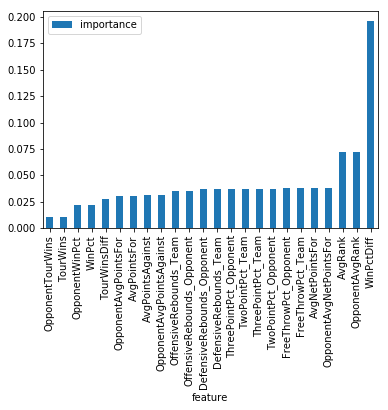

In [46]:
importance_df = pd.DataFrame({
        'feature': features,
        'importance': rf.feature_importances_
    })
importance_df.sort_values(by='importance').plot(x='feature', kind='bar')

In [47]:
importance_df.sort_values(by='importance', ascending=False)

,feature,importance
14,WinPctDiff,0.196248
11,OpponentAvgRank,0.072256
10,AvgRank,0.072146
20,OpponentAvgNetPointsFor,0.037987
17,AvgNetPointsFor,0.037908
2,FreeThrowPct_Team,0.037745
7,FreeThrowPct_Opponent,0.037586
5,TwoPointPct_Opponent,0.037059
1,ThreePointPct_Team,0.037003
0,TwoPointPct_Team,0.036987


## Random Forest: Feature Importance for Tournament (2014-2017)

In [48]:
rf.fit(X_dev2_combined, y_dev2_combined)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

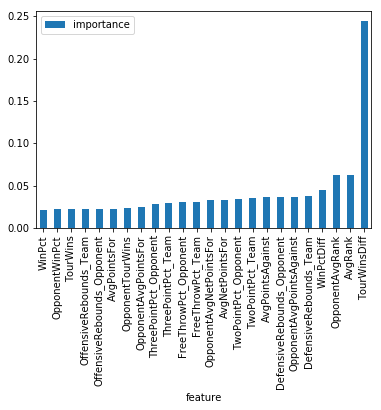

In [49]:
importance_df = pd.DataFrame({
        'feature': features,
        'importance': rf.feature_importances_
    })
importance_df.sort_values(by='importance').plot(x='feature', kind='bar')

In [50]:
importance_df.sort_values(by='importance', ascending=False)

,feature,importance
23,TourWinsDiff,0.244403
10,AvgRank,0.063191
11,OpponentAvgRank,0.063040
14,WinPctDiff,0.044820
4,DefensiveRebounds_Team,0.038119
19,OpponentAvgPointsAgainst,0.037221
9,DefensiveRebounds_Opponent,0.036457
16,AvgPointsAgainst,0.036325
0,TwoPointPct_Team,0.034887
5,TwoPointPct_Opponent,0.034744


#### Remarks:
WinPctDiff makes a difference in the regular season, but does not in the tournament.